# Scraping Article URLs

In [1]:
import os
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup as bs
import urllib.request 
from bs4 import NavigableString
from urllib.request import urlopen
from selenium.common.exceptions import ElementClickInterceptedException, StaleElementReferenceException


In [97]:
driver = webdriver.Chrome()

# link = driver.find_element_by_class_name("load-more")


In [3]:
raw_headlines=[]
raw_links=[]
raw_dates=[]
domains=[
    'vaccines',
    'asia',
    'keyword/cell-gene-therapy',
    'keyword/drug-delivery',
    'facilities'
]
for domain in domains:
    driver.get(f"https://www.fiercepharma.com/{domain}")
    time.sleep(3)
    click=0
    for click in range(30):
        try:
            # time.sleep(2) #for page to load
            # link.click()
            time.sleep(2) #for page to load
            # driver.execute_script("window.scrollTo(500, document.body.scrollHeight);")
            # time.sleep() #for page to load
            # link = driver.find_element(By.XPATH,"//a[@title='Load more items']")
            link = driver.find_element(By.XPATH,"//div/span[@class='extended-load d-inline-block']")
            link.click()
            # time.sleep(2)
            click+=1
        except ElementClickInterceptedException:
            click+=0
        except StaleElementReferenceException:
            click+=0
        except:
            click+=1
    dates = driver.find_elements(By.CLASS_NAME, "date.d-inline-block")
    headlines1 = driver.find_elements(By.XPATH,"//h3[@class='element-title large']//a")
    headlines2 = driver.find_elements(By.XPATH,"//h3[@class='element-title xsmall']//a")
    headlines3 = driver.find_elements(By.XPATH,"//div[@class='element-title small']//a")
    for headline in headlines1:
        raw_links.append(headline.get_attribute("href"))
        raw_headlines.append(headline.text)
    for headline in headlines2:
        raw_links.append(headline.get_attribute("href"))
        raw_headlines.append(headline.text)
    for headline in headlines3:
        raw_links.append(headline.get_attribute("href"))
        raw_headlines.append(headline.text)
    for date in dates:
        raw_dates.append(date.text)
print(len(raw_headlines))
print(len(raw_dates))
print(len(raw_links))

1079
1067
1079


In [74]:
# test_links=test_links.split(',')
test_links[0]=test_links[0].replace('[','')
raw_links=[i.replace("'",'') for i in test_links]
raw_links

['https://www.fiercepharma.com/pharma/moderna-looks-scale-back-manufacturing-covid-booster-cope-falling-demand-reuters',
 ' https://www.fiercepharma.com/pharma/cdc-starts-wild-mild-campaign-reverse-falling-flu-vaccine-use-key-groups',
 ' https://www.fiercepharma.com/manufacturing/japan-awards-115m-arcturus-jv-boost-mrna-manufacturing',
 ' https://www.fiercepharma.com/marketing/biontech-and-x-warned-pr-body-trying-duck-covid-19-vaccine-debate',
 ' https://www.fiercepharma.com/manufacturing/astrazeneca-commits-mrna-signs-vaccine-manufacturing-deal-chinas-cansino',
 ' https://www.fiercepharma.com/pharma/echoing-pfizer-biontech-carefully-watching-cost-amid-declining-covid-vaccine-sales',
 ' https://www.fiercepharma.com/pharma/takeda-yanks-fda-application-dengue-vaccine-citing-data-collection-disagreement',
 ' https://www.fiercepharma.com/manufacturing/novavax-receive-350m-canada-canceled-covid-vaccine-orders',
 ' https://www.fiercepharma.com/marketing/fingerprint-spying-growing-vaccine-mar

In [109]:
article_list=pd.read_csv("working_list.csv")['article']
problematic_list=list(pd.read_csv("problems.csv")['0'])
date_list=pd.read_csv("working_list.csv")['date']
raw_links=pd.read_csv("ref.csv")['raw_links']

In [113]:
len(article_list)+len(problematic_list)

402

In [120]:
# article_list=pd.read_csv("working_list.csv")['article'][0]
# problematic_list=pd.read_csv("problems.csv")['problems'][0]
# date_list=pd.read_csv("working_list.csv")['date'][0]
# raw_links=pd.read_csv("working_list.csv")['raw_links'][0]
article_list=[]
problematic_list=[]
date_list=[]
i=len(article_list)+len(problematic_list)+1
for url in raw_links[len(article_list)+len(problematic_list):]:
        driver.get(url)
        try:
                time.sleep(2)
                # paragraphs=driver.find_elements(By.TAG_NAME,"p")
                # paragraphs=driver.find_elements(By.XPATH,"//div[@class='col content']//p")
                url_paragraphs=[]
                url_paragraphs.extend([i.text for i in driver.find_elements(By.XPATH,"//div[@class='col content']//p")])
                # for paragraph in paragraphs:
                #         url_paragraphs.append(paragraph.text)
                article_list.append(url_paragraphs)
                date_list.append(driver.find_elements(By.XPATH,"//span[@class='date d-block d-md-inline-block']")[0].text)
        except:
                problematic_list.append(url)
        print(f"done with {i}")
        i+=1

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=117.0.5938.132)
Stacktrace:
0   chromedriver                        0x00000001033ead98 chromedriver + 4337048
1   chromedriver                        0x00000001033e2e14 chromedriver + 4304404
2   chromedriver                        0x000000010300fa5c chromedriver + 293468
3   chromedriver                        0x0000000102fe86c0 chromedriver + 132800
4   chromedriver                        0x000000010307c04c chromedriver + 737356
5   chromedriver                        0x000000010308f198 chromedriver + 815512
6   chromedriver                        0x0000000103048a5c chromedriver + 526940
7   chromedriver                        0x0000000103049908 chromedriver + 530696
8   chromedriver                        0x00000001033b0de4 chromedriver + 4099556
9   chromedriver                        0x00000001033b52a0 chromedriver + 4117152
10  chromedriver                        0x00000001033bb52c chromedriver + 4142380
11  chromedriver                        0x00000001033b5da0 chromedriver + 4119968
12  chromedriver                        0x000000010338da74 chromedriver + 3955316
13  chromedriver                        0x00000001033d2a48 chromedriver + 4237896
14  chromedriver                        0x00000001033d2bc4 chromedriver + 4238276
15  chromedriver                        0x00000001033e2a8c chromedriver + 4303500
16  libsystem_pthread.dylib             0x0000000187ad7034 _pthread_start + 136
17  libsystem_pthread.dylib             0x0000000187ad1e3c thread_start + 8


In [101]:
import pandas as pd
working_df=pd.DataFrame(data={'article':article_list,'date':date_list})
working_df.to_csv("working_list.csv")
ref=pd.DataFrame(data={'headlines':raw_headlines,'raw_links':raw_links})
ref.to_csv("ref.csv")
problems=pd.DataFrame(problematic_list)
problems.to_csv("problems.csv")

In [118]:
working_df['article'][3].join()

AttributeError: 'list' object has no attribute 'join'

In [53]:
import pandas as pd 
pd.DataFrame(raw_headlines).to_csv("period.csv")
pd.DataFrame(raw_headlines[578:1394]).to_csv("period_of_interest.csv")

In [54]:
pd.read_csv("period_of_interest.csv")

,Unnamed: 0,0
0,0,https://www.businesstimes.com.sg/companies-mar...
1,1,https://www.businesstimes.com.sg/companies-mar...
2,2,https://www.businesstimes.com.sg/companies-mar...
3,3,https://www.businesstimes.com.sg/lifestyle/nft...
4,4,https://www.businesstimes.com.sg/singapore-fin...
...,...,...
811,811,https://www.businesstimes.com.sg/companies-mar...
812,812,https://www.businesstimes.com.sg/companies-mar...
813,813,https://www.businesstimes.com.sg/companies-mar...
814,814,https://www.businesstimes.com.sg/companies-mar...


In [94]:
list_of_urls=raw_headlines[551:1345]

# Extracting .txt files

In [2]:
import pandas as pd
list_of_urls=list(pd.read_csv("period_of_interest.csv")['0'])
list_of_urls

['https://www.businesstimes.com.sg/companies-markets/banking-finance/apollo-holds-crypto-clients-it-expands-digital-assets',
 'https://www.businesstimes.com.sg/companies-markets/banking-finance/hong-kong-moves-towards-legalising-retail-investor-crypto-trading',
 'https://www.businesstimes.com.sg/companies-markets/banking-finance/crypto-broker-genesis-says-lending-plunged-80-third-quarter',
 'https://www.businesstimes.com.sg/lifestyle/nft-reboot-how-some-are-reimagining-its-future',
 'https://www.businesstimes.com.sg/singapore-fintech-festival-2022',
 'https://www.businesstimes.com.sg/companies-markets/banking-finance/singapore-fintech-festival-2022/cryptocom-doubles-down-security',
 'https://www.businesstimes.com.sg/companies-markets/banking-finance/bitcoin-miner-core-scientific-says-it-may-seek-bankruptcy',
 'https://www.businesstimes.com.sg/companies-markets/banking-finance/hong-kong-plans-legalise-retail-crypto-trading-become-hub',
 'https://www.businesstimes.com.sg/opinion-features

In [156]:
article_list=[]
date_list=[]
successful_url_list=[]
problematic_url_list=[]
title_list=[]
n=1
# PATH = os.path.expanduser("~/Desktop/NLP-AD/chromedriver")
# driver = webdriver.Chrome(PATH)
for url in list_of_urls:
    driver.get(url)
    try:
        time.sleep(3)
        link=driver.find_element(By.CLASS_NAME,"button")
        link.click()
    except:
        pass
    
    try:
        title=driver.find_element(By.XPATH,"//h1[@class='headline']").text
        title_list.append(title)
        url_paragraphs=[]
        texts = driver.find_elements(By.XPATH, "//div[@class='paragraph--type-text mb-5']//p")
        for text in texts:
            if text.text=='':
                pass
            else:
                url_paragraphs.append(text.text)
        article_list.append(url_paragraphs)
        date=driver.find_element(By.XPATH,"//div[@class='created d-inline-block']")
        date_list.append(date.text)
        successful_url_list.append(url)
        print(n)
        n+=1
    except:
        problematic_url_list.append(url)


/var/folders/2f/3wbl6jy15yn8q19cy3k8yf3c0000gn/T/ipykernel_22008/3061371832.py:8: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(PATH)


KeyboardInterrupt: 

In [3]:
scraped_table=pd.read_excel("Scraped articles.xlsx")
scraped_table

,Unnamed: 0,Date,URLs,Headline,Articles
0,0,"MON, OCT 31, 2022 - 07:09 PM",https://www.businesstimes.com.sg/companies-mar...,Apollo holds crypto for clients as it expands ...,APOLLO Global Management has begun holding cry...
1,1,"MON, OCT 31, 2022 - 11:32 AM",https://www.businesstimes.com.sg/companies-mar...,Hong Kong moves towards legalising retail-inve...,HONG KONG will start a consultation on legalis...
2,2,"SUN, OCT 30, 2022 - 08:00 AM",https://www.businesstimes.com.sg/companies-mar...,Crypto broker Genesis says lending plunged 80%...,"CRYPTO brokerage Genesis, reeling from a sharp..."
3,3,"THU, OCT 27, 2022 - 06:00 PM",https://www.businesstimes.com.sg/lifestyle/nft...,The NFT reboot: How some are reimagining its f...,NaN
4,4,"FRI, OCT 28, 2022 - 05:50 AM",https://www.businesstimes.com.sg/companies-mar...,Crypto.com doubles down on security to rebuild...,A US$35 million hack it suffered earlier this ...
...,...,...,...,...,...
770,16,"THU, OCT 21, 2021 - 03:17 PM",https://www.businesstimes.com.sg/companies-mar...,Crypto market tops US$2.7t as rally reaches be...,[SINGAPORE] Optimism about digital assets stok...
771,17,"THU, OCT 21, 2021 - 10:17 AM",https://www.businesstimes.com.sg/companies-mar...,Australia should change laws to accommodate cr...,[SYDNEY] Australia needs to introduce new regu...
772,18,"THU, OCT 21, 2021 - 09:40 AM",https://www.businesstimes.com.sg/companies-mar...,Bitcoin surges to all-time high in crypto's 'v...,"[SINGAPORE] Bitcoin rallied to a record, toppi..."
773,19,"WED, OCT 20, 2021 - 11:22 AM",https://www.businesstimes.com.sg/companies-mar...,'Unintentional gift': US steps into China's Bi...,"[ROCKDALE, United States] The long sheds at No..."


In [4]:
article_list=[]
date_list=[]
successful_url_list=[]
problematic_url_list=[]
title_list=[]
n=len(scraped_table)
PATH = os.path.expanduser("~/Desktop/NLP-AD/chromedriver")
driver = webdriver.Chrome(PATH)
for url in list_of_urls[list_of_urls.index(scraped_table['URLs'][len(scraped_table)-1])+1:]:
    driver.get(url)
    try:
        time.sleep(3)
        link=driver.find_element(By.CLASS_NAME,"button")
        link.click()
    except:
        pass
    
    try:
        title=driver.find_element(By.XPATH,"//h1[@class='headline']").text
        title_list.append(title)
        url_paragraphs=[]
        texts = driver.find_elements(By.XPATH, "//div[@class='paragraph--type-text mb-5']//p")
        for text in texts:
            if text.text=='':
                pass
            else:
                url_paragraphs.append(text.text)
        article_list.append(url_paragraphs)
        date=driver.find_element(By.XPATH,"//div[@class='created d-inline-block']")
        date_list.append(date.text)
        successful_url_list.append(url)
        print(n)
        n+=1
    except:
        problematic_url_list.append(url)


/var/folders/2f/3wbl6jy15yn8q19cy3k8yf3c0000gn/T/ipykernel_15443/1821586381.py:8: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(PATH)


775
776
777
778
779
780
781
782
783
784
785
786
787
788
789
790
791
792
793
794
795
796


In [5]:
problematic_url_list

[]

In [6]:
article_list

[['EAGER to get a share of the institutional money pouring into the crypto space, Singapore crypto exchange Coinhako has launched a digital assets platform for high-net-worth individuals (HNWIs) and institutions.',
  'Coinhako Privé will offer institutional-grade digital asset services and white glove services, such as a dedicated relationship manager, personalised support from industry experts and zero trading fees, Coinhako said on Tuesday.',
  'The platform will be open to accredited investors with at least S$300,000 in annual income or S$2 million in net personal assets, or S$1 million in net financial assets. Institutions that invest S$100,000 or above in annual crypto trading volume will also be eligible.',
  'Coinhako launched in 2014 and has thus far focused on the retail market.',
  '"Though retail in Singapore remains the driving market force, we have seen a huge increase in interest from institutions and high-net-worth individuals, including our existing customers," said its

In [7]:
for article in article_list:
    try:
        article.remove('Your feedback is important to us')
        article.remove('Tell us what you think. Email us at btuserfeedback@sph.com.sg')
        article.remove('For more stories, go to bt.sg/sff2022')
    except ValueError:
        pass
article_list

[['EAGER to get a share of the institutional money pouring into the crypto space, Singapore crypto exchange Coinhako has launched a digital assets platform for high-net-worth individuals (HNWIs) and institutions.',
  'Coinhako Privé will offer institutional-grade digital asset services and white glove services, such as a dedicated relationship manager, personalised support from industry experts and zero trading fees, Coinhako said on Tuesday.',
  'The platform will be open to accredited investors with at least S$300,000 in annual income or S$2 million in net personal assets, or S$1 million in net financial assets. Institutions that invest S$100,000 or above in annual crypto trading volume will also be eligible.',
  'Coinhako launched in 2014 and has thus far focused on the retail market.',
  '"Though retail in Singapore remains the driving market force, we have seen a huge increase in interest from institutions and high-net-worth individuals, including our existing customers," said its

In [8]:
story_list=[]
for article in article_list:
    story_list.append(' '.join(article))
story_list

['EAGER to get a share of the institutional money pouring into the crypto space, Singapore crypto exchange Coinhako has launched a digital assets platform for high-net-worth individuals (HNWIs) and institutions. Coinhako Privé will offer institutional-grade digital asset services and white glove services, such as a dedicated relationship manager, personalised support from industry experts and zero trading fees, Coinhako said on Tuesday. The platform will be open to accredited investors with at least S$300,000 in annual income or S$2 million in net personal assets, or S$1 million in net financial assets. Institutions that invest S$100,000 or above in annual crypto trading volume will also be eligible. Coinhako launched in 2014 and has thus far focused on the retail market. "Though retail in Singapore remains the driving market force, we have seen a huge increase in interest from institutions and high-net-worth individuals, including our existing customers," said its chief executive and 

In [9]:
pd.DataFrame(data={'Date':date_list,'URLs':successful_url_list,'Headline':title_list,'Articles':story_list})

,Date,URLs,Headline,Articles
0,"TUE, OCT 19, 2021 - 11:42 AM",https://www.businesstimes.com.sg/companies-mar...,Coinhako launches platform for HNWIs and insti...,EAGER to get a share of the institutional mone...
1,"TUE, OCT 19, 2021 - 06:49 AM",https://www.businesstimes.com.sg/international...,Cryptocurrencies can undermine effectiveness o...,[WASHINGTON] The rising use of cryptocurrencie...
2,"TUE, OCT 19, 2021 - 05:50 AM",https://www.businesstimes.com.sg/companies-mar...,Hatten Land eyes the metaverse but struggles t...,
3,"MON, OCT 18, 2021 - 05:50 AM",https://www.businesstimes.com.sg/companies-mar...,Bitcoin makes run towards new high amid ETF ex...,London BITCOIN-to-the-moon traders are back wi...
4,"SAT, OCT 16, 2021 - 05:50 AM",https://www.businesstimes.com.sg/wealth/wealth...,Crypto and a society's happiness,
5,"SAT, OCT 16, 2021 - 05:50 AM",https://www.businesstimes.com.sg/wealth/wealth...,Optimism for approval of first Bitcoin ETF hit...,OPTIMISM is sky-high in the US$6.7 trillion ex...
6,"THU, OCT 14, 2021 - 09:36 AM",https://www.businesstimes.com.sg/international...,G-7 finance officials endorse principles for c...,[WASHINGTON] G-7 finance officials on Wednesda...
7,"WED, OCT 13, 2021 - 11:12 PM",https://www.businesstimes.com.sg/companies-mar...,US is biggest bitcoin miner after China crackdown,[LONDON] The United States has overtaken China...
8,"TUE, OCT 12, 2021 - 11:52 PM",https://www.businesstimes.com.sg/companies-mar...,Binance unit launches US$1b fund to fast-track...,"[CAYMAN ISLANDS] Binance Smart Chain, a unit o..."
9,"TUE, OCT 12, 2021 - 11:36 AM",https://www.businesstimes.com.sg/companies-mar...,"Bitcoin rally pauses near US$57,000 as traders...",[NEW YORK] A rally in Bitcoin paused around th...


In [10]:
pd.concat([scraped_table.drop(columns="Unnamed: 0"),pd.DataFrame(data={'Date':date_list,'URLs':successful_url_list,'Headline':title_list,'Articles':story_list})])

,Date,URLs,Headline,Articles
0,"MON, OCT 31, 2022 - 07:09 PM",https://www.businesstimes.com.sg/companies-mar...,Apollo holds crypto for clients as it expands ...,APOLLO Global Management has begun holding cry...
1,"MON, OCT 31, 2022 - 11:32 AM",https://www.businesstimes.com.sg/companies-mar...,Hong Kong moves towards legalising retail-inve...,HONG KONG will start a consultation on legalis...
2,"SUN, OCT 30, 2022 - 08:00 AM",https://www.businesstimes.com.sg/companies-mar...,Crypto broker Genesis says lending plunged 80%...,"CRYPTO brokerage Genesis, reeling from a sharp..."
3,"THU, OCT 27, 2022 - 06:00 PM",https://www.businesstimes.com.sg/lifestyle/nft...,The NFT reboot: How some are reimagining its f...,NaN
4,"FRI, OCT 28, 2022 - 05:50 AM",https://www.businesstimes.com.sg/companies-mar...,Crypto.com doubles down on security to rebuild...,A US$35 million hack it suffered earlier this ...
...,...,...,...,...
17,"WED, OCT 06, 2021 - 02:08 PM",https://www.businesstimes.com.sg/companies-mar...,Bitcoin bulls eye fresh peaks after bucking gl...,[SINGAPORE] Animal spirits are stirring again ...
18,"TUE, OCT 05, 2021 - 06:17 PM",https://www.businesstimes.com.sg/companies-mar...,Bitcoin hits US$50k for first time in four weeks,"[LONDON] Bitcoin, the world's biggest cryptocu..."
19,"TUE, OCT 05, 2021 - 05:50 AM",https://www.businesstimes.com.sg/companies-mar...,Behind the crypto broker accused of enabling r...,"Oakland, California A CRYPTOCURRENCY broker th..."
20,"FRI, OCT 01, 2021 - 05:50 AM",https://www.businesstimes.com.sg/companies-mar...,Crypto exchange Independent Reserve obtains MA...,


In [11]:
pd.concat([scraped_table.drop(columns="Unnamed: 0"),pd.DataFrame(data={'Date':date_list,'URLs':successful_url_list,'Headline':title_list,'Articles':story_list})]).to_excel("Scraped articles.xlsx")

## Test Code

In [115]:
driver.get(list_of_urls[0])
try:
    time.sleep(2)
    link=driver.find_element(By.CLASS_NAME,"button")
    link.click()
except:
    pass


In [134]:
headlines = driver.find_elements(By.XPATH, "//div[@class='paragraph--type-text mb-5']")
headlines

[<selenium.webdriver.remote.webelement.WebElement (session="3d84b39cca4ae5f9007091da4d29f090", element="0a4a1857-788a-4cf6-b4ca-b54b5b66b453")>]

In [157]:
headlines = driver.find_elements(By.XPATH, "//div[@class='paragraph--type-text mb-5'[//p")
headlines

InvalidSelectorException: Message: invalid selector: Unable to locate an element with the xpath expression //div[@class='paragraph--type-text mb-5'[//p because of the following error:
SyntaxError: Failed to execute 'evaluate' on 'Document': The string '//div[@class='paragraph--type-text mb-5'[//p' is not a valid XPath expression.
  (Session info: chrome=111.0.5563.64)
Stacktrace:
0   chromedriver                        0x00000001048e4428 chromedriver + 4899880
1   chromedriver                        0x0000000104861a23 chromedriver + 4364835
2   chromedriver                        0x00000001044abbf6 chromedriver + 474102
3   chromedriver                        0x00000001044afc94 chromedriver + 490644
4   chromedriver                        0x00000001044af876 chromedriver + 489590
5   chromedriver                        0x00000001044afd1c chromedriver + 490780
6   chromedriver                        0x00000001044ef10c chromedriver + 749836
7   chromedriver                        0x00000001044ef751 chromedriver + 751441
8   chromedriver                        0x0000000104533871 chromedriver + 1030257
9   chromedriver                        0x000000010451558d chromedriver + 906637
10  chromedriver                        0x0000000104530b5b chromedriver + 1018715
11  chromedriver                        0x0000000104515333 chromedriver + 906035
12  chromedriver                        0x00000001044df55f chromedriver + 685407
13  chromedriver                        0x00000001044e0a7e chromedriver + 690814
14  chromedriver                        0x00000001048b179e chromedriver + 4691870
15  chromedriver                        0x00000001048b6961 chromedriver + 4712801
16  chromedriver                        0x00000001048bd2ff chromedriver + 4739839
17  chromedriver                        0x00000001048b785a chromedriver + 4716634
18  chromedriver                        0x0000000104889fce chromedriver + 4530126
19  chromedriver                        0x00000001048d75c8 chromedriver + 4847048
20  chromedriver                        0x00000001048d7747 chromedriver + 4847431
21  chromedriver                        0x00000001048ec87f chromedriver + 4933759
22  libsystem_pthread.dylib             0x00007fff70a65109 _pthread_start + 148
23  libsystem_pthread.dylib             0x00007fff70a60b8b thread_start + 15


In [160]:
headlines = driver.find_elements(By.XPATH, "//div[@class='paragraph--type-text mb-5']//p")
for headline in headlines:
    if headline.text=='':
        pass
    else:
        print(headline.text)
date=driver.find_element(By.XPATH,"//div[@class='created d-inline-block']")
print(date.text)

APOLLO Global Management has begun holding cryptocurrency on behalf of its clients through a partnership with digital asset platform Anchorage Digital, in a major push by one of the world's largest asset managers to bring crypto to institutional investors.
The move comes despite a rocky year for the crypto market, with bitcoin, the world's largest digital asset, down more than 50 per cent since the start of 2022, as investors have appeared jittery about decades-high inflation across the globe.
"It's the validation of this incessant drumbeat that is here to stay," said Diogo Mónica, president of Anchorage Digital, a crypto firm that holds a national trust bank charter from the Office of the Comptroller of the Currency. "This is a very long-term horizon process and technology and that for the large institutions, it doesn't really matter that there is volatility short term."
Apollo, which declined to disclose what types of crypto assets it holds, said its relationship with Anchorage dates

In [149]:
headlines = driver.find_elements(By.XPATH, "//div[@class='paragraph--type-text mb-5']")
headlines

AttributeError: 'list' object has no attribute 'text'

In [148]:
testlist=[]
for headline in headlines:
    testlist.append(headline.get_attribute("value"))
testlist

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [136]:
# headlines = driver.__getattribute__("div")
headlines
for headline in headlines:
    headline.get_attribute("p")


In [110]:
link=driver.find_element(By.LINK_TEXT,'Advertisement')
link.click()

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"link text","selector":"Advertisement"}
  (Session info: chrome=111.0.5563.64)
Stacktrace:
0   chromedriver                        0x00000001048e4428 chromedriver + 4899880
1   chromedriver                        0x0000000104861a23 chromedriver + 4364835
2   chromedriver                        0x00000001044abbf6 chromedriver + 474102
3   chromedriver                        0x00000001044ef4f0 chromedriver + 750832
4   chromedriver                        0x00000001044ef751 chromedriver + 751441
5   chromedriver                        0x0000000104533834 chromedriver + 1030196
6   chromedriver                        0x000000010451558d chromedriver + 906637
7   chromedriver                        0x0000000104530b5b chromedriver + 1018715
8   chromedriver                        0x0000000104515333 chromedriver + 906035
9   chromedriver                        0x00000001044df55f chromedriver + 685407
10  chromedriver                        0x00000001044e0a7e chromedriver + 690814
11  chromedriver                        0x00000001048b179e chromedriver + 4691870
12  chromedriver                        0x00000001048b6961 chromedriver + 4712801
13  chromedriver                        0x00000001048bd2ff chromedriver + 4739839
14  chromedriver                        0x00000001048b785a chromedriver + 4716634
15  chromedriver                        0x0000000104889fce chromedriver + 4530126
16  chromedriver                        0x00000001048d75c8 chromedriver + 4847048
17  chromedriver                        0x00000001048d7747 chromedriver + 4847431
18  chromedriver                        0x00000001048ec87f chromedriver + 4933759
19  libsystem_pthread.dylib             0x00007fff70a65109 _pthread_start + 148
20  libsystem_pthread.dylib             0x00007fff70a60b8b thread_start + 15


In [95]:
# sometimes experience interruptions e.g. in network connection during extraction.
# lns [4-6] make it more convenient to resume from where the extraction was interrupted.
processed_list=[]
n=1

In [105]:
html = urllib.request.urlopen(list_of_urls[0]).read()
soup = bs(html, features='html.parser')

In [104]:
html

b'<!doctype html>\n<html>\n<head>\n  <title></title>\n  <style>\n    html, body {\n      margin: 0;\n      padding: 0;\n      background-color: white;\n    }\n  </style>\n</head>\n<body>\n  <script>(function(N){var C=new Error("HALT");var T={},P={};var n=ReferenceError,p=TypeError,Z=Object,W=RegExp,f=Number,I=String,Y=Array,V=Z.bind,U=Z.call,w=U.bind(V,U),h=Z.apply,A=w(h),g=[].push,j=[].pop,D=[].slice,d=[].splice,e=[].join,y=[].map,m=w(g),t=w(D),r=w(e),k=w(y),i={}.hasOwnProperty,E=w(i),q=JSON.stringify,v=Z.getOwnPropertyDescriptor,u=Z.defineProperty,S=I.fromCharCode,X=Math.min,H=Math.floor,b=Z.create,l="".indexOf,G="".charAt,o=w(l),O=w(G),z=typeof Uint8Array==="function"?Uint8Array:Y;var s=["getPrototypeOf","\\u202ElpwgjzQAR\\u202D","lastIndexOf","iAbp7Ho","ntY2PqLTaA","zSSE6Tg_pQ","N0c","4","1YsiSrOd","assign","some","gVr630pKzKc","D8pEYsn9NzA2Axh4Vg","u2DVjV5tpqg","height","caAGbfakA0NXa3J7ZUo","getEntriesByType","{\\\\s*\\\\[\\\\s*native\\\\s+code\\\\s*]\\\\s*}\\\\s*$","yPpmcc30FQ",

In [106]:
soup

<!DOCTYPE html>

<html>
<head>
<title></title>
<style>
    html, body {
      margin: 0;
      padding: 0;
      background-color: white;
    }
  </style>
</head>
<body>
<script>(function(N){var C=new Error("HALT");var T={},P={};var n=ReferenceError,p=TypeError,Z=Object,W=RegExp,f=Number,I=String,Y=Array,V=Z.bind,U=Z.call,w=U.bind(V,U),h=Z.apply,A=w(h),g=[].push,j=[].pop,D=[].slice,d=[].splice,e=[].join,y=[].map,m=w(g),t=w(D),r=w(e),k=w(y),i={}.hasOwnProperty,E=w(i),q=JSON.stringify,v=Z.getOwnPropertyDescriptor,u=Z.defineProperty,S=I.fromCharCode,X=Math.min,H=Math.floor,b=Z.create,l="".indexOf,G="".charAt,o=w(l),O=w(G),z=typeof Uint8Array==="function"?Uint8Array:Y;var s=["getPrototypeOf","\u202ElpwgjzQAR\u202D","lastIndexOf","iAbp7Ho","ntY2PqLTaA","zSSE6Tg_pQ","N0c","4","1YsiSrOd","assign","some","gVr630pKzKc","D8pEYsn9NzA2Axh4Vg","u2DVjV5tpqg","height","caAGbfakA0NXa3J7ZUo","getEntriesByType","{\\s*\\[\\s*native\\s+code\\s*]\\s*}\\s*$","yPpmcc30FQ","jMhLMpXNDz9oIgIIPC2TzXuFLrIdQEDEyuB

In [96]:
for url in range(len(processed_list),len(list_of_urls)):
    html = urllib.request.urlopen(list_of_urls[url])
    soup = bs(html, 'html.parser')
    
    article_body = soup.find_all('main', {'id':'article-stream-0'})
    with open(f'Article {n}','w') as f:
        
    # keeping option to include title in .txt files. Excluding this for now because titles capitalize words
    # irregularly, and hinder pre-processing.
        #f.write(soup.title.text)
        #f.write('\n')

        all_paragraphs = article_body[0].find_all('p',{'class':'','data-nosnippet':''})
        
        # removing all ticker links from the extraction
        for ticker in article_body[0].find_all('fbs-ticker'):
            ticker.decompose()
            
        # Removing irrelevant paragraphs - Forbes articles frequently include bodies of text tagged <p> that are not
        # relevant to the main content of the article, with varying section titles. Here I scrape each of the section
        # titles separately, so they can be stored in separate lists for checking if/when necessary.
    
        # test if the article_body contains a "Further Reading" section at the end of the article, which contains 
        # purely links that should be excluded
        if isinstance(article_body[0].find(text="Further Reading"), NavigableString):
            further_reading = article_body[0].find(text="Further Reading").find_all_next('p',{'class':'','data-nosnippet':''})
        else:
            further_reading = []

        # test if the article_body contains a "See related posts" section at the end of the article, which also contains 
        # purely links that should be excluded
        if isinstance(article_body[0].find(text="See related posts: "), NavigableString):
            related_posts = article_body[0].find(text="See related posts: ").find_all_next('p',{'class':'','data-nosnippet':''})
            related_posts.append(article_body[0].find('p',text="See related posts: "))
        else:
            related_posts = []
        
        # test if the article_body contains a "See related posts here" section at the end of the article, which also contains 
        # purely links that should be excluded
        if isinstance(article_body[0].find(text="See related posts here: "), NavigableString):
            related_posts_here = article_body[0].find(text="See related posts here: ").find_all_next('p',{'class':'','data-nosnippet':''})
            related_posts_here.append(article_body[0].find('p',text="See related posts here: "))
        else:
            related_posts_here = []
        
        # taking out Further Readings/Related Posts from article body, if they exist
        content_paragraphs =[paragraph for paragraph in all_paragraphs if paragraph not in further_reading]
        semifinal_content_paragraphs=[paragraph for paragraph in content_paragraphs if paragraph not in related_posts]
        final_content_paragraphs=[paragraph for paragraph in semifinal_content_paragraphs if paragraph not in related_posts_here]
        for paragraph in content_paragraphs:   
            f.write(paragraph.text)
            f.write('\n')
            
    processed_list.append(url)
    n+=1

IndexError: list index out of range

In [5]:
# check that articles have been extracted from all the URLs
print(len(processed_list))
print(len(list_of_urls))

290
290


# Pre-Processing

**Note: please run Section 5 first, to define dictionary of contractions**

In [7]:
import pandas as pd
import string
import regex as re
import spacy
from nltk.tokenize import word_tokenize
from pywsd.utils import lemmatize_sentence
!pip install -i https://test.pypi.org/simple/ stanza
import stanza
import contractions

pd.set_option('display.max_colwidth', None)
sp = spacy.load('en_core_web_sm')
all_stopwords = sp.Defaults.stop_words
stanza.download('en')
nlp = stanza.Pipeline('en')

Warming up PyWSD (takes ~10 secs)... took 18.97073006629944 secs.


Looking in indexes: https://test.pypi.org/simple/


2022-09-27 21:36:58 INFO: Downloading default packages for language: en (English) ...
2022-09-27 21:37:00 INFO: File exists: /Users/kevin/stanza_resources/en/default.zip
2022-09-27 21:37:07 INFO: Finished downloading models and saved to /Users/kevin/stanza_resources.
2022-09-27 21:37:07 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2022-09-27 21:37:09 INFO: Loading these models for language: en (English):
| Processor    | Package   |
----------------------------
| tokenize     | combined  |
| pos          | combined  |
| lemma        | combined  |
| depparse     | combined  |
| sentiment    | sstplus   |
| constituency | wsj       |
| ner          | ontonotes |

2022-09-27 21:37:09 INFO: Use device: cpu
2022-09-27 21:37:09 INFO: Loading: tokenize
2022-09-27 21:37:09 INFO: Loading: pos
2022-09-27 21:37:09 INFO: Loading: lemma
2022-09-27 21:37:09 INFO: Loading: depparse
2022-09-27 21:37:10 INFO: Loading: sentiment
2022-09-27 21:37:10 INFO: Loading: constituency
2022-09-27 21:37:11 INFO: Loading: ner
2022-09-27 21:37:11 INFO: Done loading processors!


In [8]:
f=open('Article 275','r')

#inputs for table, to compare original and preprocessed results.
original_list=[]
edited_list=[]

#first, analyzing by paragraph to better check preprocessing steps.
for article in f.readlines():
    original_list.append(article)
    
    #censoring company names
    doc = nlp(article)
    for ent in doc.ents:
        if ent.type == 'ORG':
            article=article.replace(ent.text,'')
    
    #expanding contractions - see bottom for dictionary.
    #necessary because without expansion, contractions are not recognized as stop words e.g. wasn't, didn't, Syed's.
    #given that most contractions involve stopwords, in this use case there's little (but some) difference between
    #using a library and hard-coding the stopwords: both approaches usually lead to stopwords being removed.
    
    #in this case, hard-coded because:
        # the contractions library cannot handle some words e.g. 
            # "U.S." is converted to "yous".
            # after "Apple's" is converted to " 's " in the first step, " 's " is not recognized contraction/stopword.
        # Hard-coding leaves more flexibility/control over the common contractions to address.
    
    #Noted that if this approach is applied to foreign words the result may be distorted, though such cases are few. 
    #The " 's " contraction is a notable exception; foreign words that include the " 's " string may be more common.
    #Absent a better solution, have included it in the dictionary for now.
    
    for contraction, full_spelling in contractions_dict.items():
        article = article.replace(contraction, full_spelling)
    
    #removing numbers and words with numbers e.g. 1st, 2nd
    article=re.sub(r'\w*\d\w*','',article).strip()
    
#    #to simply remove numbers and keep words with numbers:
#    remove_digits = str.maketrans('','',digits)
#    article = article.translate(remove_digits)
    
    #removing punctuation
    remove_punct = str.maketrans('','',string.punctuation)
    article = article.translate(remove_punct)
    #some of Forbes's punctuations are unusual. For instance, open/close quotation marks and apostrophes. 
    #All of the below need to be explicitly removed
    for other_punctuation in ["“","”","‘","’"]:
        article = article.replace(other_punctuation,"")
    
    #lowercase
    article=article.lower()
    
    #tokenization in order to remove stop words - since lemmatization is imperfect e.g. returns 'his' as 'hi',
    #removing stop words first to improve accuracy.
    #returns string for sentence lemmatization.
    article = word_tokenize(article)
    article = ' '.join(word for word in article if word not in all_stopwords)
    
    #lemmatization/stemming - given smaller document count, lemmatizing for greater accuracy.
    article = lemmatize_sentence(article, keepWordPOS=True)[1]    
    
    edited_list.append(article)
    
#comparing original and edited paragraphs for checking
test=pd.DataFrame(list(zip(original_list, edited_list)), columns = ['Original', 'Edited'])
test

,Original,Edited
0,"As part of its first Automotive Investor Day today, Qualcomm announced a pair of new partnerships with Mercedes-Benz and Red Hat. Qualcomm has moved aggressively in recent years to diversify its business beyond mobile devices with vehicles seen as a prime hunting ground and it’s already making significant inroads. \n","[automotive, investor, day, today, announce, pair, new, partnership, move, aggressively, recent, year, diversify, business, mobile, device, vehicle, see, prime, hunt, ground, make, significant, inroad]"
1,"In the fourth quater of fiscal year 2021, Qualcomm had almost $11 billion in revenue of which approximately $350 million was automotive, mostly for the cellular modems that provide connectivity as well as some Snapdragon processors that run infotainment systems. At the company’s 2021 investor day, CEO Cristiano Amon set a target of $3.5 billion in automotive revenue for 2026 and $8 billion by 2031. With the announcements that have been made since then, the chip design company is on its way, particularly winning business away from Intel subsidiary, Mobileye. \n","[fourth, quater, fiscal, year, billion, revenue, approximately, million, automotive, cellular, modem, provide, connectivity, processor, run, infotainment, system, company, investor, day, ceo, cristiano, amon, set, target, billion, automotive, revenue, billion, announcement, chip, design, company, way, particularly, win, business, away, subsidiary]"
2,"Earlier this year, GM started using the Qualcomm Snapdragon Ride platform to power the advanced driver assist systems (ADAS) in the Cadillac Lyriq and will be expanding the use of Qualcomm silicon to other models from 2023. Both BMW and Volkswagen have also announced a shift away from Mobileye to Qualcomm on new models beginning in 2025. Stellantis has also selected Qualcomm digital chassis platforms to power the new cabin systems it is developing with Foxconn.\n","[earlier, year, start, snapdragon, ride, platform, power, advance, driver, assist, system, adas, cadillac, lyriq, expand, use, silicon, model, announce, shift, away, new, model, begin, select, digital, chassis, platform, power, new, cabin, system, develop]"
3,The latest announcements are focused on the software defined vehicle area. Mercedes-Benz will be adopting Qualcomm Snapdragon cockpit chips to power next-generation infotainment and connectivity systems. This marks a shift away from Nvidia which Mercedes has used in its current MBUX system. The first Mercedes vehicles with Qualcomm digital cockpit will launch in 2023\n,"[late, announcement, focus, software, define, vehicle, area, adopt, snapdragon, cockpit, chip, power, nextgeneration, infotainment, connectivity, system, mark, shift, away, current, mbux, system, vehicle, digital, cockpit, launch]"
4,"The other announcement today is a partnership with IBM-owned Red Hat to combine that company’s open source In-Vehicle Operating System with Qualcomm Digital Chassis systems. This marks Red Hat’s second entry into the automotive space this year. Earlier, GM announced that it would use Red Hat as the base operating system for its upcoming Ultifi software platform. While GM will be using Qualcomm to power the infotainment and ADAS systems on upcoming vehicles, it’s unknown if Ultifi will run on a Snapdragon platform. \n","[announcement, today, partnership, own, combine, company, open, source, digital, chassis, system, mark, second, entry, automotive, space, year, earlier, announce, use, base, operating, system, upcoming, software, platform, power, infotainment, adas, system, upcoming, vehicle, unknown, run, platform]"
5,"Like Nvidia which announced its new Thor system on a chip to power centralized compute platforms for SDVs, Qualcomm is targeting the same market but with a slightly different approach. Nvidia has developed a single giant chip to power all of the compute needs of the vehicle. For now, Qualcomm is taking a more scalable approach with multiple chips running on bl

In [9]:
#joining paragraphs to construct one list of tokens per article
article_tokens = []
for token in edited_list:
    article_tokens += token
article_tokens

['automotive',
 'investor',
 'day',
 'today',
 'announce',
 'pair',
 'new',
 'partnership',
 'move',
 'aggressively',
 'recent',
 'year',
 'diversify',
 'business',
 'mobile',
 'device',
 'vehicle',
 'see',
 'prime',
 'hunt',
 'ground',
 'make',
 'significant',
 'inroad',
 'fourth',
 'quater',
 'fiscal',
 'year',
 'billion',
 'revenue',
 'approximately',
 'million',
 'automotive',
 'cellular',
 'modem',
 'provide',
 'connectivity',
 'processor',
 'run',
 'infotainment',
 'system',
 'company',
 'investor',
 'day',
 'ceo',
 'cristiano',
 'amon',
 'set',
 'target',
 'billion',
 'automotive',
 'revenue',
 'billion',
 'announcement',
 'chip',
 'design',
 'company',
 'way',
 'particularly',
 'win',
 'business',
 'away',
 'subsidiary',
 'earlier',
 'year',
 'start',
 'snapdragon',
 'ride',
 'platform',
 'power',
 'advance',
 'driver',
 'assist',
 'system',
 'adas',
 'cadillac',
 'lyriq',
 'expand',
 'use',
 'silicon',
 'model',
 'announce',
 'shift',
 'away',
 'new',
 'model',
 'begin',
 'sel

# Simple EDA - Word Cloud

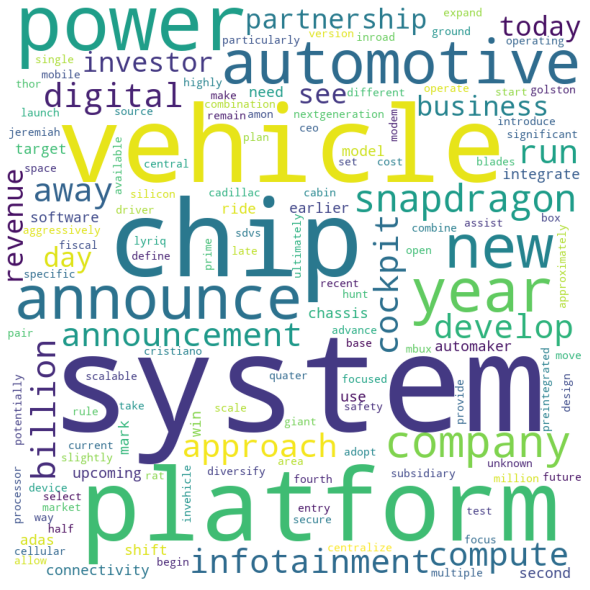

In [10]:
#generating wordcloud based on article tokens
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#converting list of article tokens into a single string
article_string=' '.join(token for token in article_tokens)

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(article_string)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Contractions Dictionary

In [6]:
contractions_dict = {
"ain’t": "are not",
"aren’t": "are not",
"can’t": "cannot",
"can’t’ve": "cannot have",
"'cause": "because",
"could’ve": "could have",
"couldn’t": "could not",
"couldn’t’ve": "could not have",
"didn’t": "did not",
"doesn’t": "does not",
"don’t": "do not",
"hadn’t": "had not",
"hadn’t’ve": "had not have",
"hasn’t": "has not",
"haven’t": "have not",
"he’d":"he would",
"he’d’ve": "he would have",
"he’ll": "he will",
"he’ll’ve": "he will have",
"how’d": "how did",
"how’d’y": "how do you",
"how’ll": "how will",
"how’s": "how is",
"I’d" : "I would",
"I’d’ve": "I would have",
"I’ll": "I will",
"I’ll’ve": "I will have",
"I’m": "I am",
"I’ve": "I have",
"isn’t": "is not",
"it’d’ve": "it would have",
"it’ll": "it will",
"it’ll’ve": "it will have",
"let’s": "let us",
"ma’am": "madam",
"mayn’t": "may not",
"might’ve": "might have",
"mightn’t": "might not",
"mightn’t’ve": "might not have",
"must’ve": "must have",
"mustn’t": "must not",
"mustn’t’ve": "must not have",
"needn’t": "need not",
"needn’t’ve": "need not have",
"o’clock": "of the clock",
"oughtn’t": "ought not",
"oughtn’t’ve": "ought not have",
"shan’t": "shall not",
"sha’n’t": "shall not",
"shan’t’ve": "shall not have",
"she’d": "she would",
"she’d’ve": "she would have",
"she’ll": "she will",
"she’ll’ve": "she will have",
"should’ve": "should have",
"shouldn’t": "should not",
"shouldn’t’ve": "should not have",
"so’ve": "so have",
"so’s": "so is",
"that’d’ve": "that would have",
"that’s": "that has / that is",
"there’d":"there would",
"there’d’ve": "there would have",
"they’d": "they would",
"they’d’ve": "they would have",
"they’ll": "they will",
"they’ll’ve": "they will have",
"they’re": "they are",
"they’ve": "they have",
"to’ve": "to have",
"wasn’t": "was not",
"we’d":"we would",
"we’d’ve": "we would have",
"we’ll": "we will",
"we’ll’ve": "we will have",
"we’re": "we are",
"we’ve": "we have",
"weren’t": "were not",
"what’d":"what would",
"what’ll": "what will",
"what’ll’ve": "what will have",
"what’re": "what are",
"what’s": "what is",
"what’ve": "what have",
"when’d": "when would",
"when’s": "when is",
"when’ve": "when have",
"where’d": "where would",
"where’ve": "where have",
"who’d":"who would",
"who’ll": "who will",
"who’ll’ve": "who shall have / who will have",
"who’ve": "who have",
"why’d":"why would",
"why’s": "why is",
"why’ve": "why have",
"will’ve": "will have",
"won’t": "will not",
"won’t’ve": "will not have",
"would’ve": "would have",
"wouldn’t": "would not",
"wouldn’t’ve": "would not have",
"y’all": "you all",
"y'all’d": "you all would",
"y’all’d’ve": "you all would have",
"y’all’re": "you all are",
"y'all’ve": "you all have",
"you’d": "you would",
"you’d’ve": "you would have",
"you’ll": "you will",
"you’ll’ve": "you will have",
"you’re": "you are",
"you’ve": "you have",
"’s": ""
 }